#GLACINDIA Workshop
##Part 10: Basemap plots

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from netCDF4 import Dataset, num2date
from mpl_toolkits.basemap import Basemap
import pandas as pd

We are going to work with REMO model regional simmulation

##Exersise

- Open data file ('../data/1989_2008_2mTmp.nc'), 
- load variable that contains surface temperature (`var167`), 
- load lat and lon

In [2]:
from netCDF4 import Dataset
f = Dataset("../data/1989_2008_2mTmp.nc")
temp=f.variables['var167'][:]

lon = f.variables['lon'][:]
lat = f.variables['lat'][:]

First we use the simple way to look at the data with imshow:

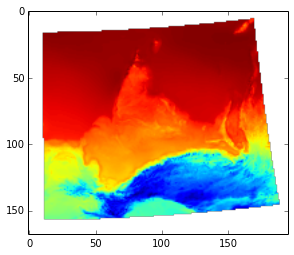

In [3]:
plt.imshow(temp[0,0,:,:])

In order to plot data on actuall map, we have to have information about location of every grid point. Let's have a look how out lat information look like:

In [4]:
lon.shape

(195,)

It is 1d, while we need 2d information. We can easily make 2d arrays from 1d:

In [5]:
lon,lat = np.meshgrid(lon,lat)

Now it's 2d:

In [6]:
lat.shape

(168, 195)

In [7]:
lon.shape

(168, 195)

The library that we are going to use for plotting called Basemap.

In [8]:
from mpl_toolkits.basemap import Basemap

Firs we have to create map instance, that will define projection of the map and and its borders

In [9]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill')

lon/lat information has to be converted to the coordinates of the image: 

In [10]:
x, y = m(lon, lat)

Now we can create our first map:

<matplotlib.colorbar.Colorbar instance at 0x7f502208e560>

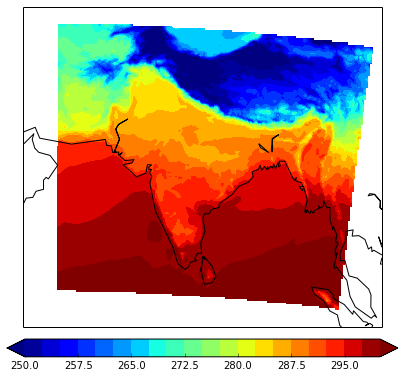

In [11]:
#set the size of the figure
plt.figure(figsize=(7,7))
#draw costlibes
m.drawcoastlines()
#create contour plot
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both");
#plot colorbar
plt.colorbar(orientation="horizontal", pad=0.03)
#plt.savefig('ind_temp_all.png', dpi=100)

##Exersise

- plot 7th timestep
- convert to Celsius and plot

###Increase coastline resolution

In [12]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='i')
x, y = m(lon, lat)

<matplotlib.colorbar.Colorbar instance at 0x7f5021c72e18>

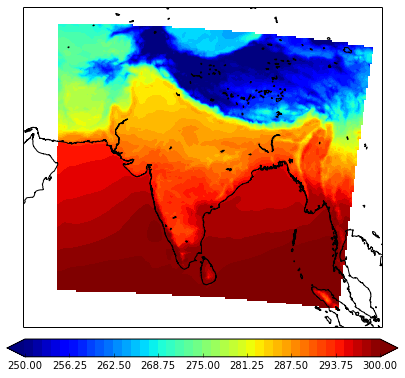

In [13]:
plt.figure(figsize=(7,7))
m.drawcoastlines()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)

Come back to the coarse resolution and plot some nice background:

In [14]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='c')
x, y = m(lon, lat)

<matplotlib.colorbar.Colorbar instance at 0x7f5021ba21b8>

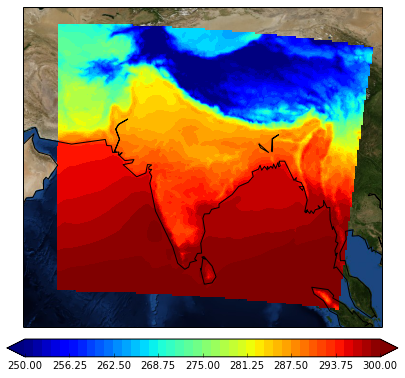

In [15]:
plt.figure(figsize=(7,7))
m.drawcoastlines()
m.bluemarble()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)

Put another background and put some transparency:

<matplotlib.colorbar.Colorbar instance at 0x7f5021bcdea8>

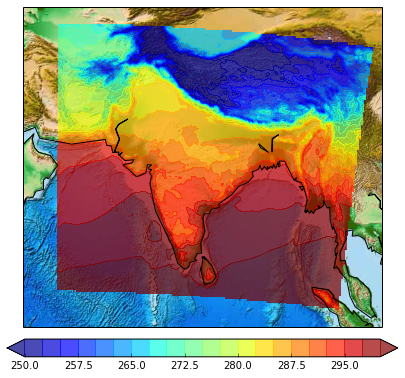

In [16]:
plt.figure(figsize=(7,7))
m.drawcoastlines()
m.etopo()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both",  alpha=0.7);
plt.colorbar(orientation="horizontal", pad=0.03)

Put some parralels and meredians:

In [17]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill', resolution='c')
x, y = m(lon, lat)

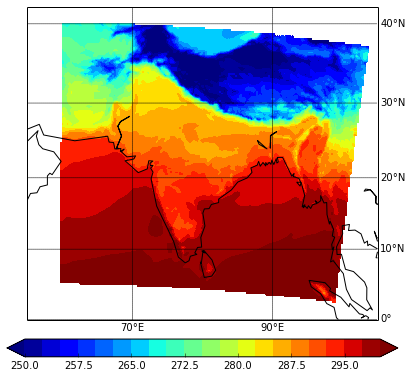

In [18]:
plt.figure(figsize=(7,7))
m.drawcoastlines()
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both");
plt.colorbar(orientation="horizontal", pad=0.05)
plt.savefig('myfigure.png', dpi=300)

Use some strange colors:

<matplotlib.colorbar.Colorbar instance at 0x7f50205cfea8>

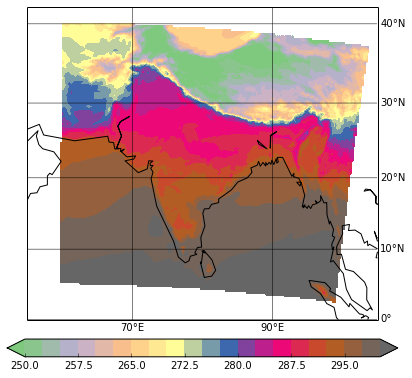

In [20]:
plt.figure(figsize=(7,7))
m.drawcoastlines()
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,21), extend="both", cmap=plt.cm.Accent);

plt.colorbar(orientation="horizontal", pad=0.05)


##Exersise

- Create the map, tune it according to your taste.

##Bonus example - plot data with rotated pole

In [21]:
m = Basemap(llcrnrlon=55,llcrnrlat=0,urcrnrlon=105,urcrnrlat=42,projection='mill')
x, y = m(lon, lat)

In [22]:
m= Basemap(projection='rotpole',\
           lon_0=180-123.34,\
           lat_0=90-79.95,\
           o_lon_p=-123.34,\
           o_lat_p=79.95,\
           llcrnrlat = 4,\
           urcrnrlat = 38,\
           llcrnrlon = 59,\
           urcrnrlon = 105,\
           resolution='c')

In [23]:
x, y = m(lon, lat)

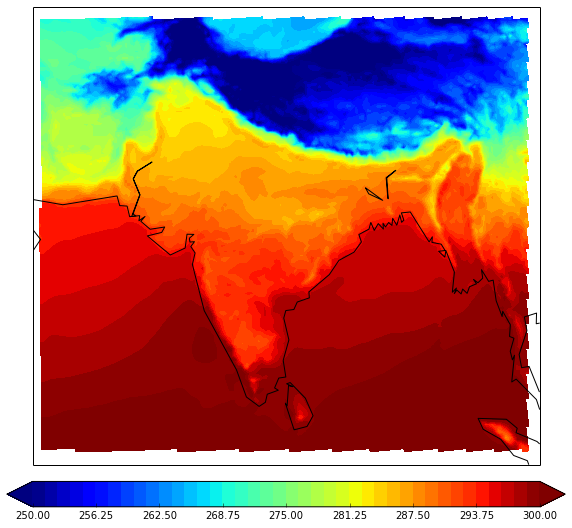

In [24]:
plt.figure(figsize=(10,10))
m.drawcoastlines()
m.contourf(x,y,temp[0,0,:,:],levels=np.linspace(250,300,41), extend="both");
plt.colorbar(orientation="horizontal", pad=0.03)
plt.savefig('ind_temp_all.png', dpi=100)

##Exersise

Plot precipitation data ('../data/1989_2008_Precip.nc')

- import nessesary modules
- open netCDF file 
- copy variables from this file
- look at the data using imshow
- create 2D versions of lon and lat (use np.meshgrid)
- create basmeap map 